<a href="https://colab.research.google.com/github/anubhavgupta1/Udacity/blob/main/Perceptron/Breast%20Cancer/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation, rc
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import  train_test_split

#**Load The Data**

In [2]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
print("The size of data is : ", X.shape)
print("The size of label is : ", y.shape)

The size of data is :  (569, 30)
The size of label is :  (569,)


In [3]:
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["class"] = breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
data["class"].value_counts()

1    357
0    212
Name: class, dtype: int64

In [6]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [8]:
X = data.drop('class', axis=1)
Y = data["class"]

#**Train Test Split**

In [9]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1,stratify=Y,random_state=1)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)
print(Y.mean(),Y_train.mean(),Y_test.mean())
print(X_train['mean radius'].mean())

(569, 30) (512, 30) (57, 30)
(569,) (512,) (57,)
0.6274165202108963 0.626953125 0.631578947368421
14.058656250000015


# Perceptron Class

In [10]:
X_train = X_train.values
X_test = X_test.values

$y = 1, \mbox{if} \sum_i w_i x_i >= b$

$y =  0, \mbox{otherwise}$

In [11]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y):
    
    self.w = np.ones(X.shape[1])
    self.b = 0

    for x, y in zip(X, Y):
      y_pred = self.model(x)
      if y == 1 and y_pred == 0:
        self.w = self.w +  x
        self.b = self.b +  1
      elif y == 0 and y_pred == 1:
        self.w = self.w -  x
        self.b = self.b -  1

In [12]:
perceptron = Perceptron()
perceptron.fit(X_train,Y_train)

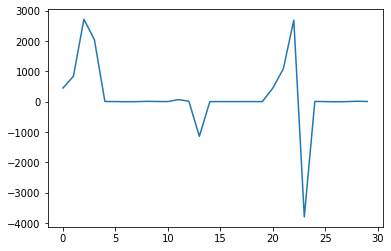

In [13]:
plt.plot(perceptron.w)
plt.show()

In [14]:
Y_pred_train = perceptron.predict(X_train)
Y_pred_test = perceptron.predict(X_test)
print("Training accuracy is : ",accuracy_score(Y_train,Y_pred_train))
print("Test accuracy is : ",accuracy_score(Y_test,Y_pred_test))

Training accuracy is :  0.373046875
Test accuracy is :  0.3684210526315789


#**Epochs**

In [15]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0
    max_accuracy_epoch = 0
    for epoch in range(epochs):
      
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w +  x
          self.b = self.b +  1
        elif y == 0 and y_pred == 1:
          self.w = self.w -  x
          self.b = self.b -  1

      accuracy[epoch] = accuracy_score(self.predict(X),Y)
      if(accuracy[epoch] > max_accuracy):
        max_accuracy = accuracy[epoch]
        max_accuracy_epoch = epoch
    
    print("Max accuraracy is : ",max_accuracy, " achieved in epoch : ",max_accuracy_epoch)
    
    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.show()

Max accuraracy is :  0.91015625  achieved in epoch :  1


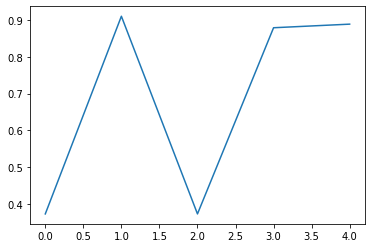

In [16]:
perceptron = Perceptron()
perceptron.fit(X_train,Y_train,5)

Max accuraracy is :  0.91015625  achieved in epoch :  1


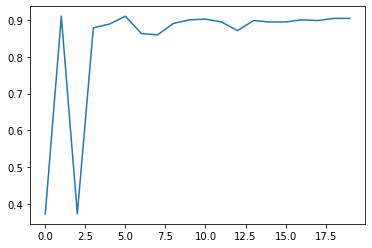

In [17]:
perceptron = Perceptron()
perceptron.fit(X_train,Y_train,20)

Max accuraracy is :  0.921875  achieved in epoch :  43


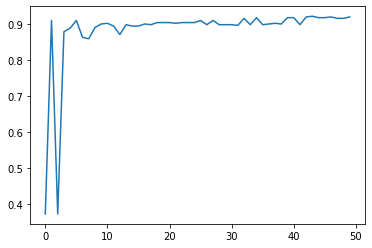

In [18]:
perceptron = Perceptron()
perceptron.fit(X_train,Y_train,50)

#**Checkpointing**
Checkpointing is the process of saving the weights of the epoch where maximum accuracy is achieved

In [19]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    chkptw = np.ones(X.shape[1])
    chkptb = 0
    accuracy = {}
    max_accuracy = 0
    max_accuracy_epoch = 0
    weights_matrix = []
    bias_matrix = []
    for epoch in range(epochs):
      
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w +  x
          self.b = self.b +  1
        elif y == 0 and y_pred == 1:
          self.w = self.w -  x
          self.b = self.b -  1
      
      weights_matrix.append(self.w)
      bias_matrix.append(self.b)
      
      accuracy[epoch] = accuracy_score(self.predict(X),Y)
      
      if(accuracy[epoch] > max_accuracy):
        max_accuracy = accuracy[epoch]
        max_accuracy_epoch = epoch
        chkptw = self.w
        chkptb = self.b
    
    self.w = chkptw
    self.b = chkptb
    print("Max accuraracy is : ",max_accuracy, " achieved in epoch : ",max_accuracy_epoch)
    
    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.show()
    return np.array(weights_matrix), np.array(bias_matrix)

Max accuraracy is :  0.921875  achieved in epoch :  43


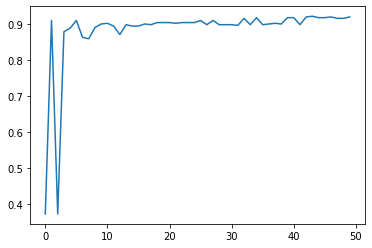

In [20]:
perceptron = Perceptron()
weights , bias = perceptron.fit(X_train,Y_train,50)

Max accuraracy is :  0.927734375  achieved in epoch :  60


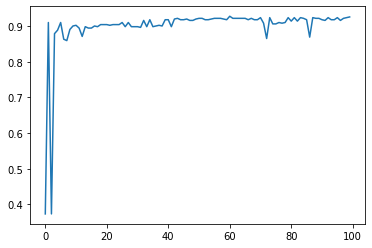

In [21]:
perceptron = Perceptron()
weights , bias = perceptron.fit(X_train,Y_train,100)

In [22]:
print(weights.shape)
print(bias.shape)

(100, 30)
(100,)


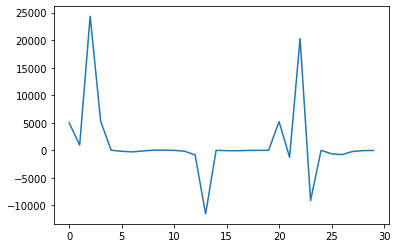

In [23]:
plt.plot(weights[-1,:])
plt.show()

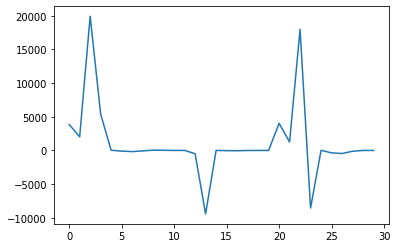

In [24]:
plt.plot(weights[60,:])
plt.show()

In [25]:
max(bias)

685

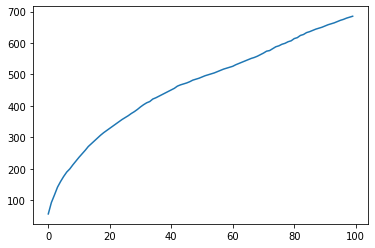

In [26]:
plt.plot(bias)
plt.show()

#**Learning Rate**
Learning rate is used to smoothen the oscillations.

In [27]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1,lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    chkptw = np.ones(X.shape[1])
    chkptb = 0
    
    accuracy = {}
    
    max_accuracy = 0
    max_accuracy_epoch = 0
    
    weights_matrix = []
    bias_matrix = []
    
    for epoch in range(epochs):
      
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w +  lr * x
          self.b = self.b +  lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w -  lr * x
          self.b = self.b -  lr * 1
      
      weights_matrix.append(self.w)
      bias_matrix.append(self.b)
      
      accuracy[epoch] = accuracy_score(self.predict(X),Y)
      
      if(accuracy[epoch] > max_accuracy):
        max_accuracy = accuracy[epoch]
        max_accuracy_epoch = epoch
        chkptw = self.w
        chkptb = self.b
    
    self.w = chkptw
    self.b = chkptb
    
    print("Max accuraracy is : ",max_accuracy, " achieved in epoch : ",max_accuracy_epoch)
    
    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.ylim([0, 1])
    plt.show()
    
    return np.array(weights_matrix), np.array(bias_matrix)

Max accuraracy is :  0.927734375  achieved in epoch :  60


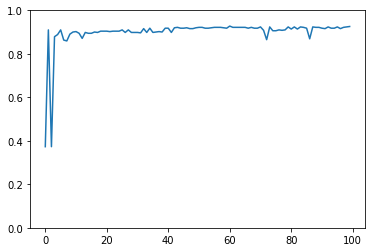

In [28]:
perceptron = Perceptron()
weights , bias = perceptron.fit(X_train,Y_train,100,1)

Max accuraracy is :  0.92578125  achieved in epoch :  85


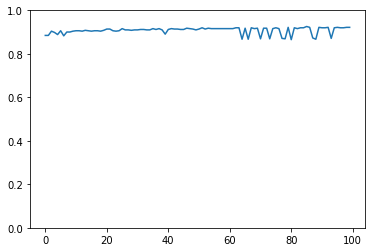

In [29]:
perceptron = Perceptron()
weights , bias = perceptron.fit(X_train,Y_train,100,0.0001)

Max accuraracy is :  0.935546875  achieved in epoch :  926


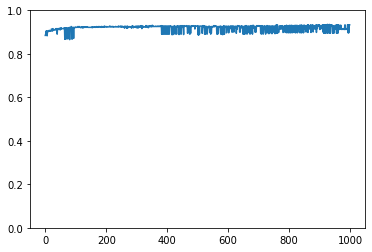

In [30]:
perceptron = Perceptron()
weights , bias = perceptron.fit(X_train,Y_train,1000,0.0001)

Max accuraracy is :  0.94921875  achieved in epoch :  7770


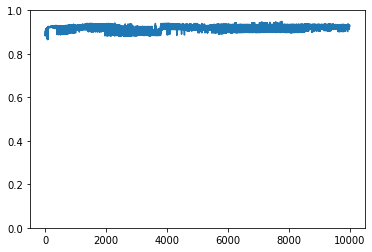

In [31]:
perceptron = Perceptron()
weights , bias = perceptron.fit(X_train,Y_train,10000,0.0001)

In [32]:
Y_pred_train = perceptron.predict(X_train)
Y_pred_test = perceptron.predict(X_test)
print("Training accuracy is : ",accuracy_score(Y_train,Y_pred_train))
print("Test accuracy is : ",accuracy_score(Y_test,Y_pred_test))

Training accuracy is :  0.94921875
Test accuracy is :  0.9473684210526315


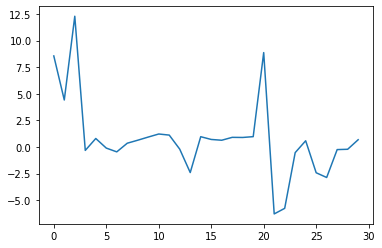

In [33]:
plt.plot(perceptron.w)
plt.show()

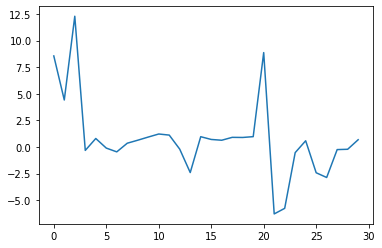

In [34]:
plt.plot(perceptron.w)
plt.show()

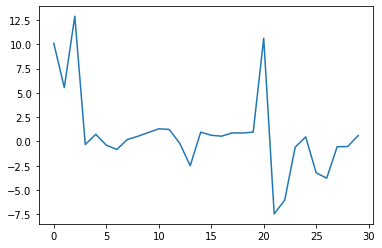

In [35]:
plt.plot(weights[-1,:])
plt.show()

#**Weights Animation**

In [36]:
weights.shape

(10000, 30)

In [37]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

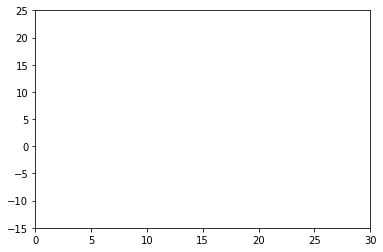

In [38]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, weights.shape[1]))
ax.set_ylim((-15, 25))

line, = ax.plot([], [], lw=2)

In [39]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(weights.shape[1]))
    y = weights[i, :]
    line.set_data(x, y)
    return (line,)

In [40]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=10000, interval=200, blit=True)

In [41]:
HTML(anim.to_html5_video())